In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
checkpoint = torch.load('./pretrained/gfnet-xs.pth', map_location='cpu')

In [3]:
def show_single_filter(gf):
    # gf: global filter: (h, h // 2 + 1, 2)
    h = gf.size(0)
    gf_complex = torch.view_as_complex(gf)
    gf_spatial = torch.fft.irfft2(gf_complex, dim=(0, 1), s=(h, h))
    gf_complex = torch.fft.fft2(gf_spatial, dim=(0, 1))
    gf_complex = torch.fft.fftshift(gf_complex, dim=(0, 1))
    gf_abs = gf_complex.abs()
    return gf_abs

n_viz_channel = 24
global_filters = []
for i_layer in range(12):
    weight = checkpoint['model'][f'blocks.{i_layer}.filter.complex_weight']
    for i_channel in range(n_viz_channel):
        global_filters.append(show_single_filter(weight[:, :, i_channel])[None])
global_filters = torch.stack(global_filters)

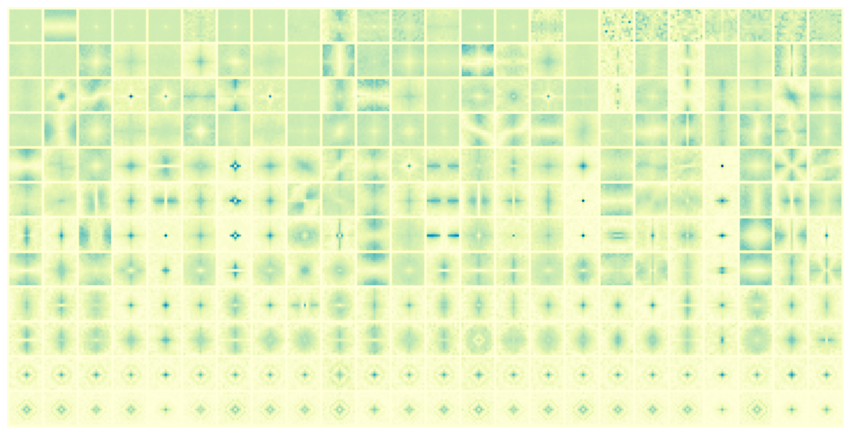

In [4]:
import torchvision
plt.figure(figsize=(15, 20))
viz = torchvision.utils.make_grid(global_filters, nrow=n_viz_channel, padding=1, pad_value=0) # , normalize=True)
viz = viz.permute(1, 2, 0)[:, :, 0].numpy()
plt.axis('off')
plt.imshow(viz, cmap='YlGnBu')